# This is the report template for the Assignment in CSCU9M3 Autumn 2022

## Follow these instructions:
- Save this file in the form: __ZZZZZZZ_M3_Aut22_TheAssignment.ipynb__ where __ZZZZZZZ__ is your student number
- Fill in the report 
 * Use a mix of code and markdown cells to tell a data-story, only the *Executive Summary* should be contained in a single markdown cell
 * all other sections should have multiple cells and outputs, where you explain what you are doing and why.
- When you are finished then ...
 * Save the file
 * Restart the Kernel and re-run the whole notebook. "Kernel" -> "Restart & Run" in the menu at top
 * Make sure everything has executed as expected. If cells run with error that you want to keep to show your attempt, then manually run every cell below the faulty one to show the output.
 * Make sure no __Markdown__ cell is in *edit* mode
 * Save file again
 * Delete this cell and remove any instructions from the template (except headings)
 * __Download this notebook as HTML__, you do that under *File->Download 1as-> HTML*
   + make sure to use the same name format, just different extension
 * __Upload the html file__ to the assessment on VLE and submit

## Executive Summary
Write a short (200 words max) summary of what the report contains and what you have discovered.

通过展示药品平均评分与怀孕类别药品的关系，怀孕类别药品与药品评分没有很大关系，且各类怀孕类别药品相差不大，最大的为N.
不同的rx_otc的访问者评分分布，otc在评分中分布更加狭长，其具有最大值，rx分布更加集中。
不同csa的药品评分关系，u和m评分分布最广。
展示top10药品种类,Upper respiratory combinations该种类最多，占比20%左右
展示每个不同的药品的活动率，发现所有药品的活动率主要分布在0-0.4范围内


## Introduction
Write a short (200 words max) introduction to the dataset, emphasising why you chose it and what you expect to discover (what you expect to discover does not have to be what you then eventually discover)

数据包含各种药物的详细信息（用于治疗痤疮、癌症、心脏病等疾病）及其副作用，有药物的化学名称（非品牌名称），药物类别，品牌名称，活动，Rx-to-OTC 转换是将经过验证的处方药转换为非处方药，怀孕类别，受控物质法 (CSA)，酒精，评分：

## Data Cleaning
In this section should demonstrate how you have programmatically cleaned and prepared the dataset you have chosen.
Explain the steps you take.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = 'SimHei'

d:\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\anaconda\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
d:\anaconda\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df=pd.read_csv('drugs_side_effects_drugs_com.csv')
df=df.dropna(subset='rating')#删除缺失值的评分

In [207]:
df=df.drop_duplicates('drug_name')

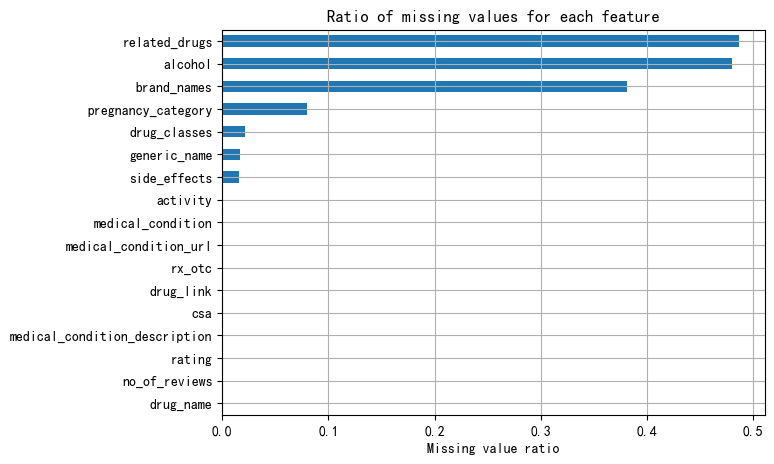

In [208]:
#展示数据的缺失比例
plt.figure(figsize= (7,5))
df.isnull().mean().sort_values().plot (kind ='barh')
plt.grid()
plt.xlabel("Missing value ratio")
plt.title("Ratio of missing values for each feature")
plt.show()

In [209]:
df=df.drop(columns=df.isnull().mean().sort_values().sort_values(ascending=False)[:3].index)#删除缺失比例大于0.3的,除了rating


In [210]:
print(len(df['drug_link'].unique()),len(df))
df=df.drop(columns='drug_link')#删除无分类意义列

1573 1573


In [211]:
a=df['pregnancy_category'].value_counts().index[0]
df['pregnancy_category']=df['pregnancy_category'].fillna(a)#使用最多的属性值填充


In [212]:
b=df['drug_classes'].value_counts().index[0]
df['drug_classes']=df['drug_classes'].fillna(b)#使用最多的属性值填充


In [213]:
df['generic_name'].value_counts()

drospirenone and ethinyl estradiol    9
isotretinoin (oral)                   8
diphenhydramine                       7
polyethylene glycol 3350              7
oxycodone                             6
                                     ..
rosiglitazone                         1
acarbose                              1
exenatide (Byetta)                    1
chromium picolinate                   1
benzphetamine                         1
Name: generic_name, Length: 898, dtype: int64

In [214]:
df['side_effects'].value_counts()

hives ; difficult breathing; swelling of your face, lips, tongue, or throat. Common side effects may include temporary hair loss (especially in children).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             5
hives ; difficulty breathing; swelling of your face, lips, tongue, or throat. Less serious side effects may occur, and you may have none at all

In [215]:
df=df.drop(columns=['generic_name','side_effects'])#删除分布比较平均的列

In [216]:
df=df.drop(columns='medical_condition_url')#删除与medical_condition一样意义的列

In [217]:
df=df.drop(columns='medical_condition_description')#删除与medical_condition一样意义的列

In [218]:
df.isna().all()#展示数据全部列是否还有缺失值

drug_name             False
medical_condition     False
drug_classes          False
activity              False
rx_otc                False
pregnancy_category    False
csa                   False
rating                False
no_of_reviews         False
dtype: bool

## Exploratory Data Analysis
Programmatically explore the dataset. Tell the reader, how the dataset looks like and at least three most interesting observations that you can learn from the data.

In [219]:

df1=df.groupby('pregnancy_category')['rating'].mean()


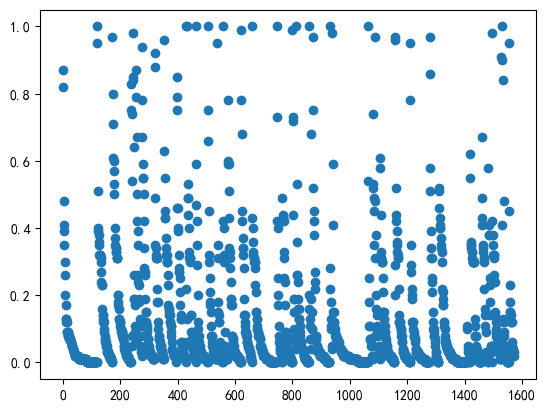

In [231]:
#展示每个不同的药品的活动率
df['activity']=df['activity'].str.extract('(\d+)').astype('int')/100
plt.scatter(list(range(len(df))),df['activity'])

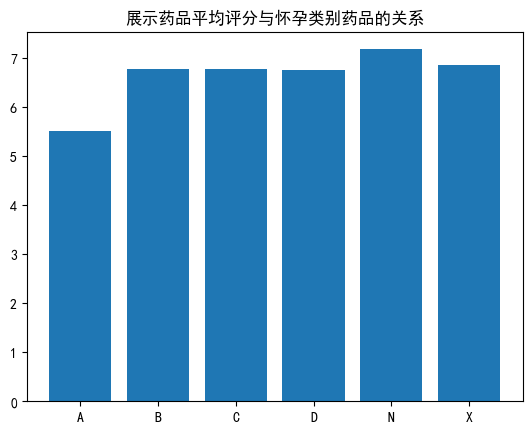

In [220]:
plt.bar(df1.index,df1)
plt.title('展示药品平均评分与怀孕类别药品的关系')
plt.show()

d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


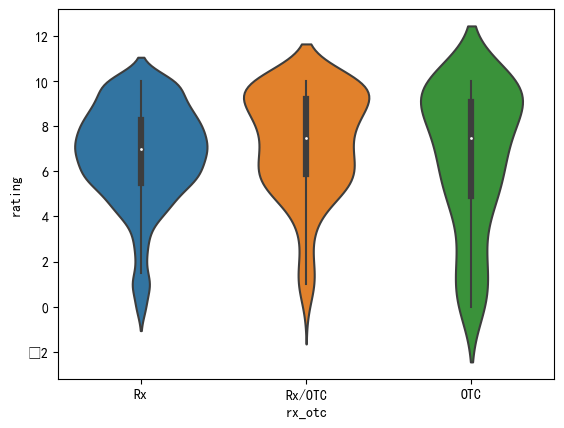

In [221]:
#展示不同的rx_otc的访问者评分分布
sns.violinplot(x = 'rx_otc', y = 'rating', data=df)
plt.show()

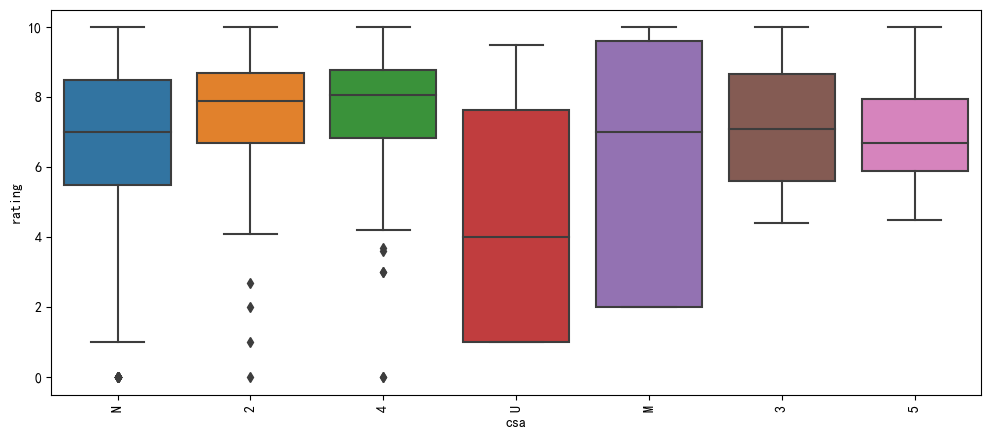

In [222]:
# 展示不同csa的药品评分关系
plt.figure(figsize = (12,5))
sns.boxplot(x = 'csa', y = 'rating', data=df)
plt.xticks(rotation=90)
plt.show()

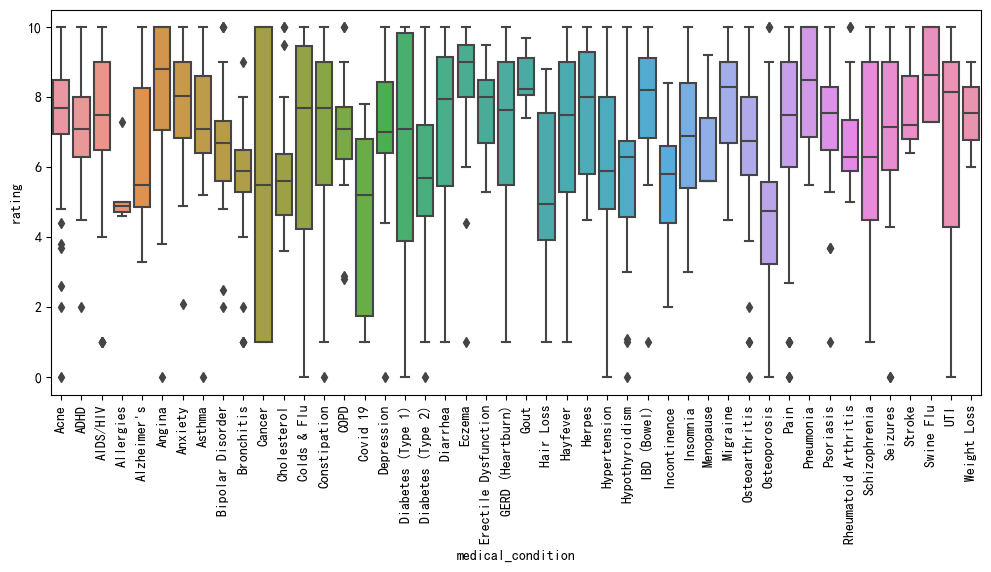

In [223]:
# 不同医疗条件的药品评分关系
plt.figure(figsize = (12,5))
sns.boxplot(x = 'medical_condition', y = 'rating', data=df)
plt.xticks(rotation=90)
plt.show()

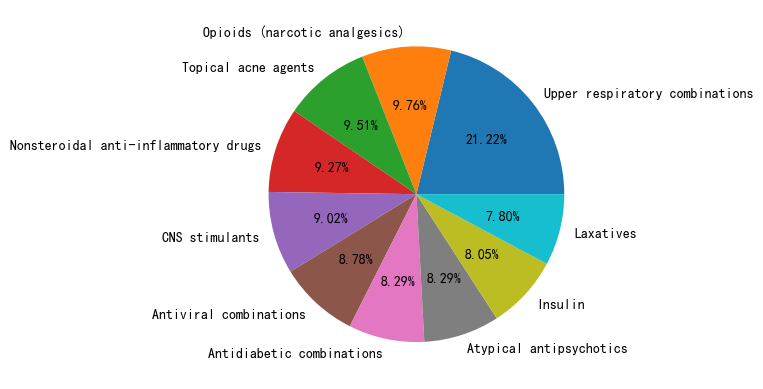

In [232]:
#展示top10药品种类
a=df['drug_classes'].value_counts()[:10]
plt.pie(a,labels=a.index,autopct='%.2f%%')
plt.xticks(rotation=90)
plt.show()

## Descriptive Analytics
Interogate the dataset with descriptive analytics. Answer 3 questions that you find interesting, and that can be answered using descriptive analytics. Make each question a subsection of this section and follow the steps: 1. the question, 2. justify why it is interesting 3. the answer.

## Suggestions
Suggest further steps to enrich the dataset with additional (external) data, or apply some additional advanced modelling or analysis. You do not have to fully implement your suggestions, but you will have to explain and justify your suggestions.

## Bibliography
List all sources you have utilised in the making of this report here.